In [41]:
#Libraries 
import numpy as np
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt 

In [ ]:
# model / parameters 
num_classes = 10
input_shape = (28,28,1)

In [ ]:
#load data and split into training and testing data
(x_train , y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

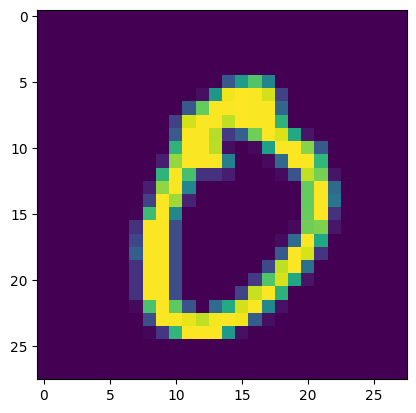

In [ ]:
plt.imshow(x_train[662])
plt.show

In [ ]:
print(y_train[662])

0


In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#scale the value between 0 and 1 
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [ ]:
#make sure image has size of 28x28
x_train = np.expand_dims(x_train , -1)
x_test = np.expand_dims(x_test , -1)
print("x_train shape " , x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

x_train shape  (60000, 28, 28, 1)
60000
10000


In [ ]:
#from tensorflow.python.data import util
#conevrt the class vectors to binary class 
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test , num_classes )

In [ ]:
model = keras.Sequential (
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(32 , kernel_size = (3,3) , activation = "relu"),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(64 , kernel_size = (3,3) , activation = "relu"),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation = "softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy" , optimizer = "adam" , metrics=["accuracy"])
model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs,validation_split = 0.1)

Epoch 1/15
422/422 [==============================] - 47s 108ms/step - loss: 0.3679 - accuracy: 0.8892 - val_loss: 0.0823 - val_accuracy: 0.9777
Epoch 2/15
422/422 [==============================] - 48s 113ms/step - loss: 0.1105 - accuracy: 0.9660 - val_loss: 0.0600 - val_accuracy: 0.9815
Epoch 3/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0827 - accuracy: 0.9745 - val_loss: 0.0453 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0713 - accuracy: 0.9781 - val_loss: 0.0449 - val_accuracy: 0.9877
Epoch 5/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0643 - accuracy: 0.9796 - val_loss: 0.0402 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 7/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0350 - val_ac

In [ ]:
score  = model.evaluate(x_test , y_test)
print("Loss" , score[0])
print("Accuracy" , score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0266 - accuracy: 0.9917
Loss 0.02657391130924225
Accuracy 0.9916999936103821


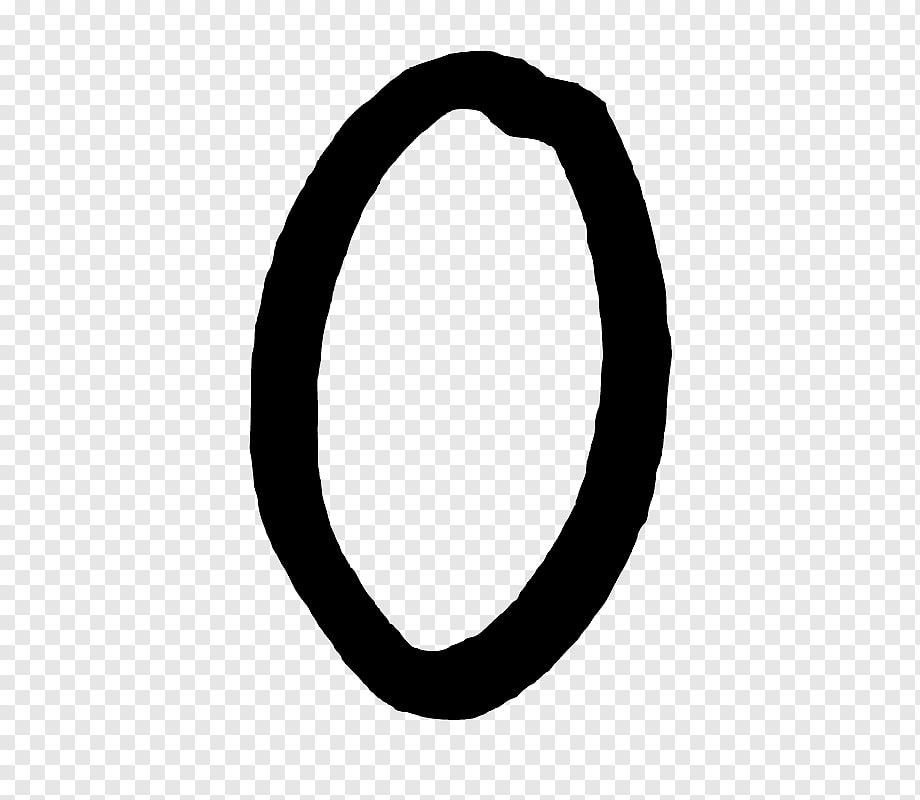

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
from PIL import Image 

input_image = cv2.imread('sample_data/Number0.jpg')
cv2_imshow(input_image)

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(grayscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('Handwritten digit is recognized as',input_pred_label)

1/1 [==============================] - 0s 22ms/step
Handwritten digit is recognized as 7
